In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mramam167x0279","key":"725eb338a706250602b6297fdc689687"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

100% 1.40G/1.41G [00:13<00:00, 132MB/s]
100% 1.41G/1.41G [00:13<00:00, 112MB/s]


In [5]:
! mkdir fruit_dataset

In [6]:
! unzip fresh-and-stale-images-of-fruits-and-vegetables.zip -d fruit_dataset

Streaming output truncated to the last 5000 lines.
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.09 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.15 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.24 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.32 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.38 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.21 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.27 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.33 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.40 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12

In [7]:
import os
import tensorflow as tf
os.listdir('fruit_dataset/')

['stale_capsicum',
 'fresh_capsicum',
 'fresh_tomato',
 'fresh_bitter_gourd',
 'stale_apple',
 'fresh_apple',
 'stale_bitter_gourd',
 'fresh_orange',
 'stale_orange',
 'stale_banana',
 'stale_tomato',
 'fresh_banana',
 'ImageLabels.txt']

In [8]:
base_dir ='fruit_dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
fresh_orange_dir = os.path.join(base_dir, 'fresh_orange')
fresh_tomato_dir = os.path.join(base_dir, 'fresh_tomato')
fresh_capsicum_dir = os.path.join(base_dir, 'fresh_capsicum')
fresh_banana_dir = os.path.join(base_dir, 'fresh_banana')
fresh_apple_dir = os.path.join(base_dir, 'fresh_apple')
fresh_bitter_gourd_dir = os.path.join(base_dir, 'fresh_bitter_gourd')
stale_orange_dir = os.path.join(base_dir, 'stale_orange')
stale_tomato_dir = os.path.join(base_dir, 'stale_tomato')
stale_capsicum_dir = os.path.join(base_dir, 'stale_capsicum')
stale_banana_dir = os.path.join(base_dir, 'stale_banana')
stale_apple_dir = os.path.join(base_dir, 'stale_apple')
stale_bitter_gourd_dir = os.path.join(base_dir, 'stale_bitter_gourd')


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )

train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )


validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          )

Found 11749 images belonging to 12 classes.
Found 2933 images belonging to 12 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.applications import ResNet50


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 512)       590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 512)      0

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.Adam(), 
              metrics= ['accuracy'])

In [13]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
            print("\nakurasi lebih besar dari 96%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [14]:
history = model.fit(
          train_generator,
          epochs=40, 
          steps_per_epoch=len(train_generator),
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          verbose=2,
          callbacks = [callbacks])

Epoch 1/40
368/368 - 136s - loss: 1.1375 - accuracy: 0.5961 - val_loss: 0.6335 - val_accuracy: 0.7763 - 136s/epoch - 370ms/step
Epoch 2/40
368/368 - 123s - loss: 0.5537 - accuracy: 0.7933 - val_loss: 0.6593 - val_accuracy: 0.7695 - 123s/epoch - 333ms/step
Epoch 3/40
368/368 - 122s - loss: 0.4035 - accuracy: 0.8505 - val_loss: 0.3726 - val_accuracy: 0.8459 - 122s/epoch - 332ms/step
Epoch 4/40
368/368 - 122s - loss: 0.3763 - accuracy: 0.8613 - val_loss: 0.3445 - val_accuracy: 0.8749 - 122s/epoch - 331ms/step
Epoch 5/40
368/368 - 122s - loss: 0.3069 - accuracy: 0.8836 - val_loss: 0.3454 - val_accuracy: 0.8769 - 122s/epoch - 332ms/step
Epoch 6/40
368/368 - 125s - loss: 0.2569 - accuracy: 0.9073 - val_loss: 0.2576 - val_accuracy: 0.9107 - 125s/epoch - 340ms/step
Epoch 7/40
368/368 - 122s - loss: 0.2823 - accuracy: 0.8961 - val_loss: 0.2253 - val_accuracy: 0.9209 - 122s/epoch - 332ms/step
Epoch 8/40
368/368 - 121s - loss: 0.2225 - accuracy: 0.9173 - val_loss: 0.2913 - val_accuracy: 0.9018 - 

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

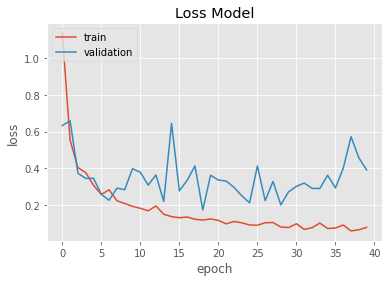

In [16]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

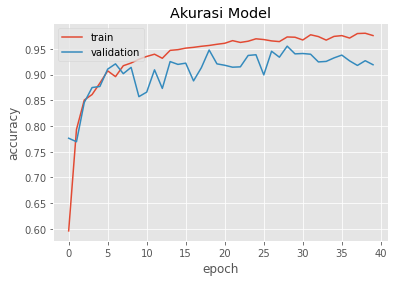

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
loss = model.evaluate(validation_generator, steps=len(validation_generator))

92/92 [==============================] - 25s 268ms/step - loss: 0.3942 - accuracy: 0.9148


In [20]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

In [21]:
print(train_generator.class_indices)

{'fresh_apple': 0, 'fresh_banana': 1, 'fresh_bitter_gourd': 2, 'fresh_capsicum': 3, 'fresh_orange': 4, 'fresh_tomato': 5, 'stale_apple': 6, 'stale_banana': 7, 'stale_bitter_gourd': 8, 'stale_capsicum': 9, 'stale_orange': 10, 'stale_tomato': 11}


Saving stale apple 2.jpg to stale apple 2 (1).jpg
1/1 [==============================] - 0s 15ms/step
stale apple 2.jpg
stale_apple


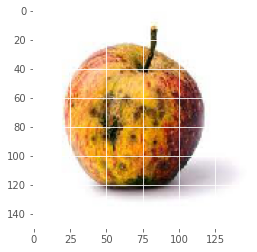

In [29]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=32) 
  output_class = np.argmax(classes) 
  print(fn)
  if output_class==0:
   print('fresh_apple')
  elif output_class==1:
    print('fresh_banana')
  elif output_class==2:
    print('fresh_bitter_gourd')
  elif output_class==3:
    print('fresh_capsicum')
  elif output_class==4:
    print('fresh_orange')
  elif output_class==5:
    print('fresh_tomato')
  elif output_class==6:
   print('stale_apple')
  elif output_class==7:
    print('stale_banana')
  elif output_class==8:
    print('stale_bitter_gourd')
  elif output_class==9:
    print('stale_capsicum')
  elif output_class==10:
    print('stale_orange')
  else:
   print('stale_tomato')

In [19]:
model.save('fruit_model.h5')